In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.regression.linear_model import OLS

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset
coffee = pd.read_csv('../data/CoffeeDataset.csv')
coffee['Date'] = pd.to_datetime(coffee['Date'])
coffee.set_index('Date', inplace=True)

In [3]:
coffee.columns

Index(['Open', 'High', 'Low', 'Settle', 'Volume', 'BRA_Temp', 'BRA_Precip',
       'COL_Precip', 'COL_Temp', 'ETH_Precip', 'ETH_Temp', 'IDN_Precip',
       'IDN_Temp', 'VNM_Precip', 'VNM_Temp', 'Production',
       'Consumption (domestic)', 'Exportable Production',
       'Gross Opening Stocks', 'Exports', 'Imports', 'Re-exports',
       'Inventories', 'Disappearance', 'Open_Interest_All',
       'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All',
       'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All',
       'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All',
       'NonRept_Positions_Short_All', 'Pct_of_OI_NonComm_Long_All',
       'Pct_of_OI_NonComm_Short_All', 'Pct_of_OI_NonComm_Spread_All',
       'Pct_of_OI_Comm_Long_All', 'Pct_of_OI_Comm_Short_All',
       'Pct_of_OI_Tot_Rept_Long_All', 'Pct_of_OI_Tot_Rept_Short_All',
       'Pct_of_OI_NonRept_Long_All', 'Pct_of_OI_NonRept_Short_All',
 

### Production and Price

In [4]:
df = coffee[['Settle','Production',
             'Disappearance','Exports',
             'Imports','Inventories']].resample('A').last()

In [5]:
df.rename(columns={'Settle':'Price'}, inplace=True)

In [23]:
def get_forward_returns(df, ranges):
    for r in ranges:
        df['Return'.format(r)] = df['Price'].pct_change(r).shift(-r)

In [24]:
get_forward_returns(df, [1])

In [25]:
last_px = 126.20
old_px = 137.05
df = df.fillna(value=(last_px - old_px)/old_px)

In [26]:
def plot_series(df, cols):
    fig = plt.figure(figsize = (12, 5))
    
    ax1 = fig.add_subplot(111)
    ax1.plot(df[cols[0]].dropna(), color='k', label=cols[0])

    ax2 = ax1.twinx()
    ax2.plot(df[cols[1]].dropna(),color='b', label=cols[1])

    plt.title('{} and {}'.format(cols[0],cols[1]), fontsize=18)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2);

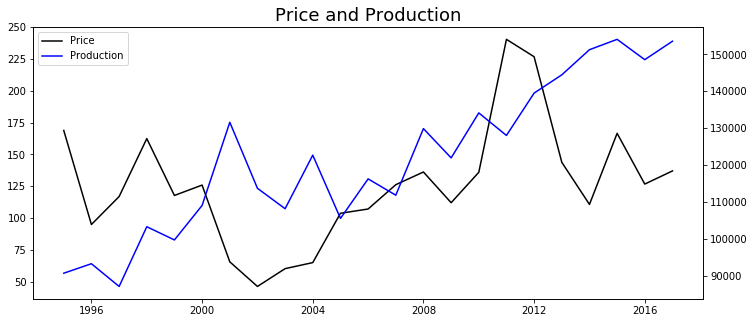

In [8]:
plot_series(df, ['Price','Production'])

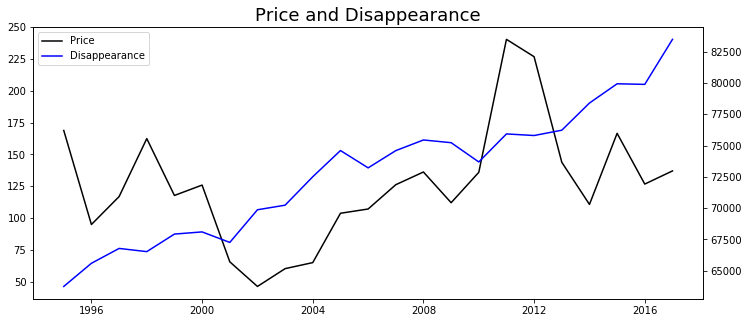

In [9]:
plot_series(df, ['Price','Disappearance'])

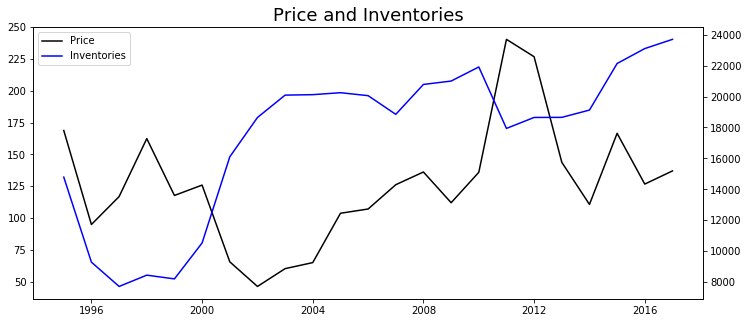

In [10]:
plot_series(df, ['Price','Inventories'])

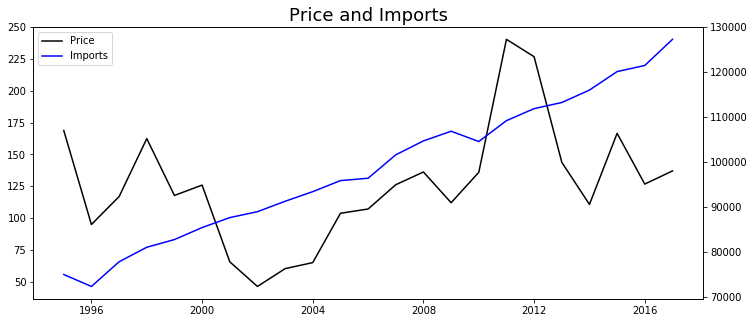

In [11]:
plot_series(df, ['Price','Imports'])

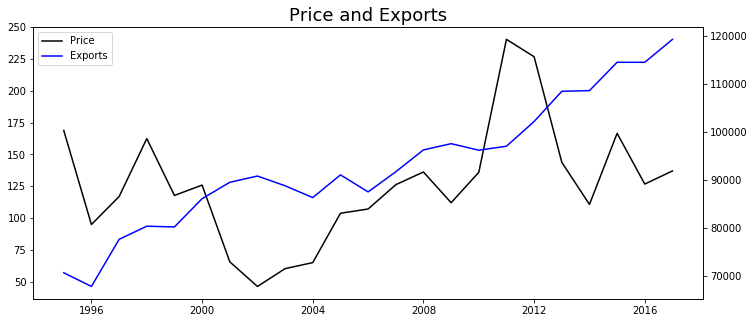

In [12]:
plot_series(df, ['Price','Exports'])

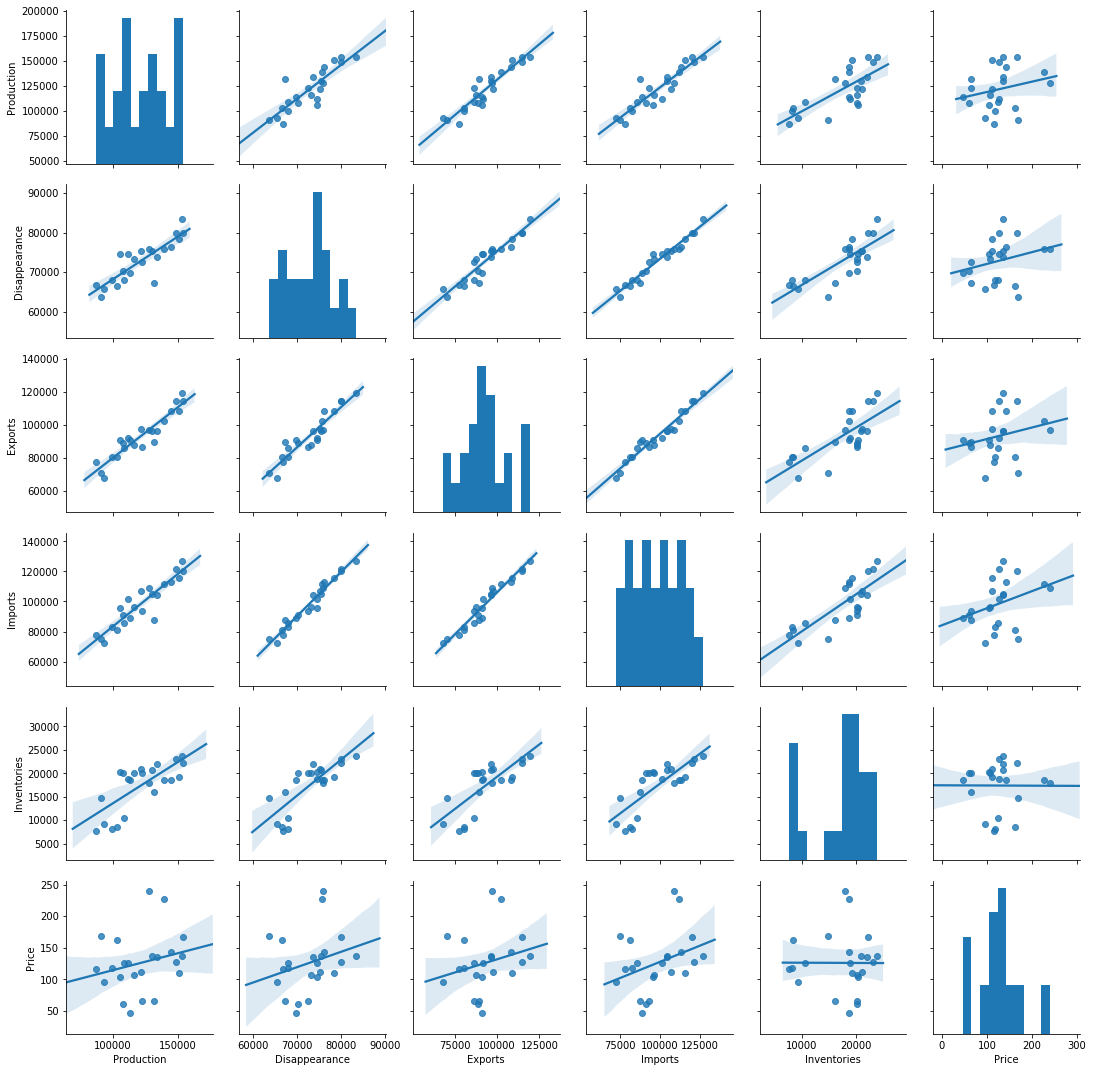

In [22]:
sns.pairplot(vars=['Production', 'Disappearance', 'Exports', 
                   'Imports', 'Inventories','Price'], 
             data=df,
             kind='reg');

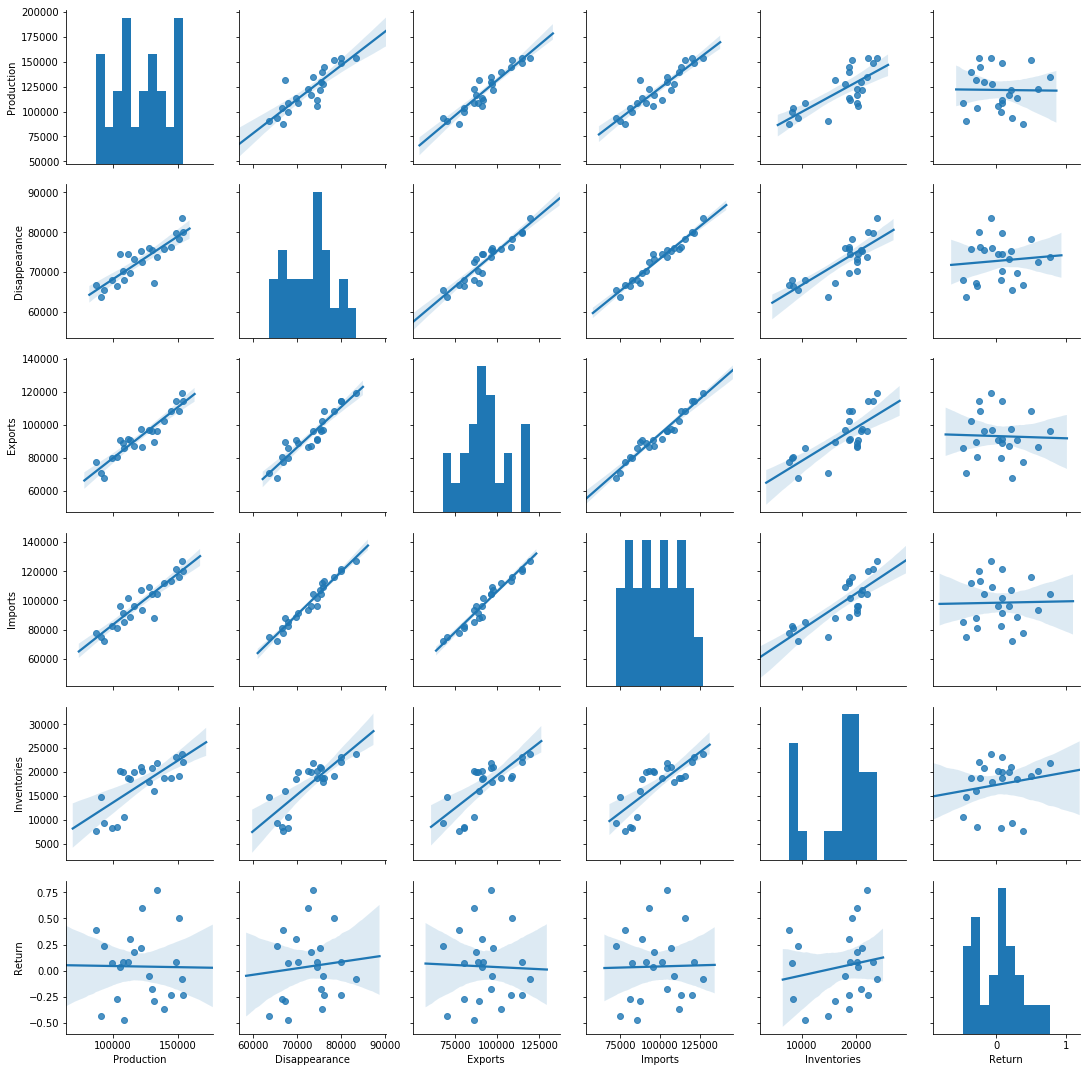

In [28]:
sns.pairplot(vars=['Production', 'Disappearance', 'Exports', 
                   'Imports', 'Inventories','Return'], 
             data=df,
             kind='reg');

In [14]:
X = df[['Production', 'Disappearance', 'Exports', 'Imports', 'Inventories']]
y = df['Price']

model = OLS(y,X)

In [15]:
lr = model.fit()

In [ ]:
lr.summary()